In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import numpy as np
import os
import sklearn
from mpl_render import RenderingImShow 
import mpl_render
import matplotlib.pyplot as plt
from visbrain.objects import ConnectObj, SceneObj, SourceObj, BrainObj
from visbrain.io import download_file
from mne.viz import plot_connectivity_circle
from matplotlib import cm
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(22,22)})

In [3]:
def plot_connectivity_brain(measure='representational_connectivity'):
    
    #create scene obj
    sc = SceneObj(size=(1500, 600), bgcolor='white')
    # Nodes
    hcp180_lh_nodes = pd.read_csv('../../data/lh_vertex_means_pre.csv', index_col=0)
    
    if measure == 'representational_connectivity':
        data_df = pd.read_csv('../../data/task/stats/rsa_association_statistics.csv')
    elif measure == 'seed_based_correlation':
        data_df = pd.read_csv('../../data/resting/stats/seed_based_correlation_association_statistics.csv')
    else:
        print('Invalid modality')
        return
    assoc_stats_b = data_df.pivot(index=['Node 1', 'Node 2'], columns='Variable', values='Coefficient')
    assoc_stats_p = data_df.pivot(index=['Node 1', 'Node 2'], columns='Variable', values='Coefficient')
    
    for idx, var in enumerate(['Duration of longest sleep bout', 
                               'PHQ-2', 
                               'Cognition', 
                               'Self-report insomnia', 
                               'Self-report daytime dozing']):
        assoc_stats_b_var = assoc_stats_b[var]
        assoc_stats_b_var = assoc_stats_b_var.unstack(level=1).fillna(0)
        assoc_stats_b_var = assoc_stats_b_var + assoc_stats_b_var.T
        assoc_stats_b_var = assoc_stats_b_var.loc[hcp180_lh_nodes.index, hcp180_lh_nodes.index]
        
        assoc_stats_p_var = assoc_stats_p[var]
        assoc_stats_p_var = assoc_stats_p_var.unstack(level=1).fillna(0)
        assoc_stats_p_var = assoc_stats_p_var + assoc_stats_p_var.T
        assoc_stats_p_var = assoc_stats_p_var.loc[hcp180_lh_nodes.index, hcp180_lh_nodes.index]
        
        p_values = assoc_stats_p_var.values
        b_values = assoc_stats_b_var.values
        
        print(type(b_values), p_values.dtype)
                
        ## # Define the connectivity and source objects
        c_cuscol = ConnectObj('default', hcp180_lh_nodes.values, b_values, select=p_values <= 0.05/5, 
                              color_by='strength', cmap='coolwarm', clim=[-.01,.01], alpha=0.2)
        s_obj_cu = SourceObj('sources', hcp180_lh_nodes.values, color='black', radius_min=2.,
                             symbol='ring', alpha=0.2)
        # Add objects to the scene
        sc.add_to_subplot(BrainObj('inflated_pre', translucent=True, hemisphere='left'), row=0, col=idx, 
                          rotate='left')

        sc.add_to_subplot(c_cuscol, row=0, col=idx)
        sc.add_to_subplot(s_obj_cu, row=0, col=idx)

        # Finally, display the scene
    
    ar = sc.render()
    # unfortunately the image gets flipped in this process and needs to get flipped back
    ar = np.flip(ar, axis = 0)
    fig, ax = plt.subplots(1, 1) 
    p = RenderingImShow( ax, size = (1500, 600), extent = (-5, 0, 0, 2), 
                        render_callback = (lambda size, extent: ar))

    # here I delete axis and colorbar, which somehow get added while applying mpl_render
    plt.axis('off') 
    plt.delaxes(fig.axes[1])



Creation of a scene
ConnectObj(name='default') created
    180 nodes detected
    strength coloring method for connectivity
    31506 connectivity links displayed
SourceObj(name='sources') created
    180 sources detected
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/vispy/visuals/markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
BrainObj(name='inflated_pre') created


<class 'numpy.ndarray'> float64


/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/vispy/gloo/buffer.py:454: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  data = data.view(dtype=[('f0', data.dtype.base, c)])
    BrainObj(name='inflated_pre') added to the scene
    ConnectObj(name='default') added to the scene
    SourceObj(name='sources') added to the scene
ConnectObj(name='default') created
    180 nodes detected
    strength coloring method for connectivity
    31506 connectivity links displayed
SourceObj(name='sources') created
    180 sources detected
BrainObj(name='inflated_pre') created
    BrainObj(name='inflated_pre') added to the scene


<class 'numpy.ndarray'> float64


    ConnectObj(name='default') added to the scene
    SourceObj(name='sources') added to the scene
ConnectObj(name='default') created
    180 nodes detected
    strength coloring method for connectivity
    31506 connectivity links displayed
SourceObj(name='sources') created
    180 sources detected
BrainObj(name='inflated_pre') created


<class 'numpy.ndarray'> float64


    BrainObj(name='inflated_pre') added to the scene
    ConnectObj(name='default') added to the scene
    SourceObj(name='sources') added to the scene
ConnectObj(name='default') created
    180 nodes detected
    strength coloring method for connectivity
    31506 connectivity links displayed
SourceObj(name='sources') created
    180 sources detected
BrainObj(name='inflated_pre') created


<class 'numpy.ndarray'> float64


    BrainObj(name='inflated_pre') added to the scene
    ConnectObj(name='default') added to the scene
    SourceObj(name='sources') added to the scene
ConnectObj(name='default') created
    180 nodes detected
    strength coloring method for connectivity
    31506 connectivity links displayed
SourceObj(name='sources') created
    180 sources detected
BrainObj(name='inflated_pre') created


<class 'numpy.ndarray'> float64


    BrainObj(name='inflated_pre') added to the scene
    ConnectObj(name='default') added to the scene
    SourceObj(name='sources') added to the scene


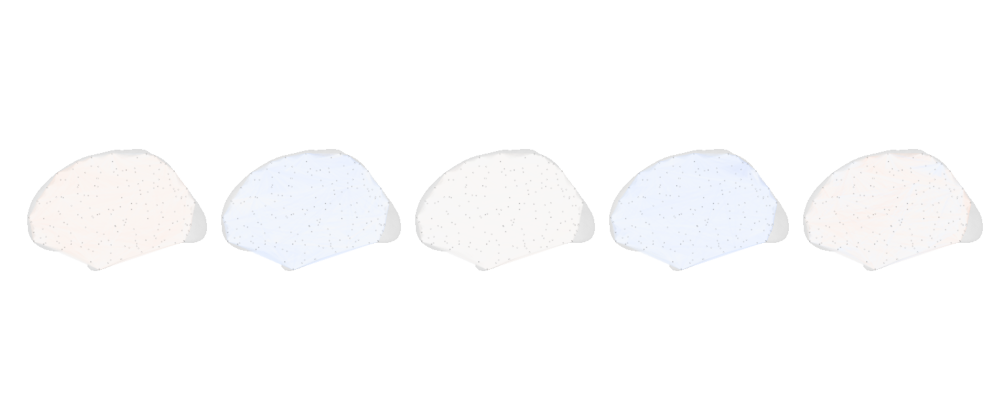

In [4]:
independent_vars = ['duration_of_longest_sleep_bout', 
                        'Sleeplessness___insomnia', 
                        'Number_of_symbol_digit_matches_made_correctly', 
                        'phq2',
                       'Daytime_dozing___sleeping_narcolepsy']
plot_connectivity_brain(measure='representational_connectivity')

Creation of a scene
ConnectObj(name='default') created
    180 nodes detected
    strength coloring method for connectivity
    30174 connectivity links displayed
SourceObj(name='sources') created
    180 sources detected
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/vispy/visuals/markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
BrainObj(name='inflated_pre') created


<class 'numpy.ndarray'> float64


/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/vispy/gloo/buffer.py:454: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  data = data.view(dtype=[('f0', data.dtype.base, c)])
    BrainObj(name='inflated_pre') added to the scene
    ConnectObj(name='default') added to the scene
    SourceObj(name='sources') added to the scene
ConnectObj(name='default') created
    180 nodes detected
    strength coloring method for connectivity
    28100 connectivity links displayed
SourceObj(name='sources') created
    180 sources detected
BrainObj(name='inflated_pre') created


<class 'numpy.ndarray'> float64


    BrainObj(name='inflated_pre') added to the scene
    ConnectObj(name='default') added to the scene
    SourceObj(name='sources') added to the scene
ConnectObj(name='default') created
    180 nodes detected
    strength coloring method for connectivity
    31424 connectivity links displayed
SourceObj(name='sources') created
    180 sources detected
BrainObj(name='inflated_pre') created
    BrainObj(name='inflated_pre') added to the scene


<class 'numpy.ndarray'> float64


    ConnectObj(name='default') added to the scene
    SourceObj(name='sources') added to the scene
ConnectObj(name='default') created
    180 nodes detected
    strength coloring method for connectivity
    28570 connectivity links displayed
SourceObj(name='sources') created
    180 sources detected
BrainObj(name='inflated_pre') created
    BrainObj(name='inflated_pre') added to the scene
    ConnectObj(name='default') added to the scene


<class 'numpy.ndarray'> float64


    SourceObj(name='sources') added to the scene
ConnectObj(name='default') created
    180 nodes detected
    strength coloring method for connectivity
    28838 connectivity links displayed
SourceObj(name='sources') created
    180 sources detected
BrainObj(name='inflated_pre') created


<class 'numpy.ndarray'> float64


    BrainObj(name='inflated_pre') added to the scene
    ConnectObj(name='default') added to the scene
    SourceObj(name='sources') added to the scene


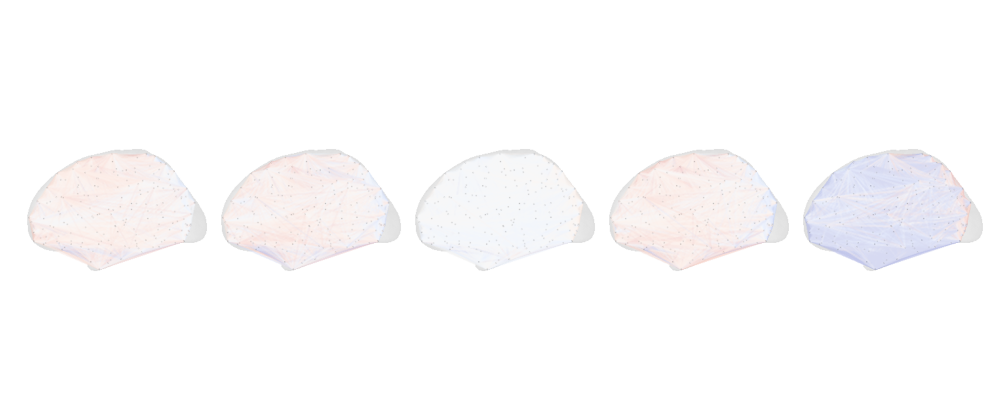

In [5]:
plot_connectivity_brain(measure='seed_based_correlation')

